In [1]:
import numpy as np
import pandas as pd
import os, sys
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train_ctrUa4K.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
print('There are in total {} number of columns and {} nubmer of rows'.format(df.shape[1], df.shape[0]))

There are in total 13 number of columns and 614 nubmer of rows


In [6]:
df.columns.to_list()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
data_stats = df.describe()
data_stats

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [345]:
df.dtypes[df.dtypes == 'object'].index.values

array(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'Property_Area'], dtype=object)

In [11]:
df[df.dtypes[df.dtypes == 'object'].index.values].isna().sum()

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [349]:
for i in df.dtypes[df.dtypes == 'object'].index.values:
    if i != 'Loan_ID':
        print(i, df[i].unique())

('Gender', array(['Male', 'Female'], dtype=object))
('Married', array(['No', 'Yes'], dtype=object))
('Education', array(['Graduate', 'Not Graduate'], dtype=object))
('Self_Employed', array(['No', 'Yes'], dtype=object))
('Property_Area', array(['Urban', 'Rural', 'Semiurban'], dtype=object))


In [350]:
df['Credit_History'].unique()

array([1., 0.])

In [12]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [13]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [14]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
loan_education = df.groupby(['Education', 'Loan_Status'])['Loan_ID'].nunique().to_dict()
loan_education

{('Graduate', 'N'): 140,
 ('Graduate', 'Y'): 340,
 ('Not Graduate', 'N'): 52,
 ('Not Graduate', 'Y'): 82}

In [16]:
loan_education.keys()

[('Not Graduate', 'N'),
 ('Not Graduate', 'Y'),
 ('Graduate', 'Y'),
 ('Graduate', 'N')]

In [17]:
(loan_education.values())

[52, 82, 340, 140]

In [18]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## Some Plots:

### DEPENDENT VARIABLE

#### LOAN_STATUS: TARGET VARIABLE 

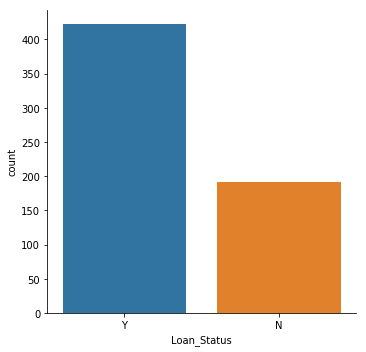

In [19]:
sns.catplot(x='Loan_Status', kind='count', data=df)

In [351]:
# Normalise can be set to true to print proportions instead of numbers
df['Loan_Status'].value_counts(normalize=True)

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64

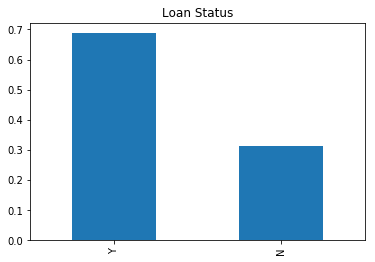

In [22]:
df['Loan_Status'].value_counts(normalize=True).plot.bar(title='Loan Status')

### INDEPENDENT VARIABLE (categorical)

#### ANALYSIS ON GENDER VARIABLE

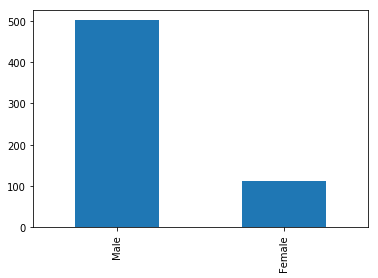

In [352]:
df['Gender'].value_counts().plot.bar()

In [353]:
df['Gender'].value_counts(normalize=True)

Male      0.81759
Female    0.18241
Name: Gender, dtype: float64

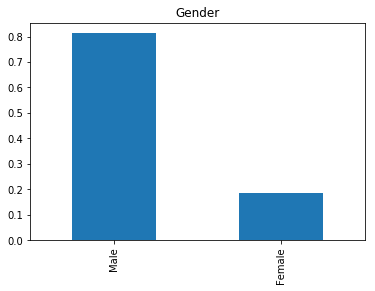

In [27]:
df['Gender'].value_counts(normalize=True).plot.bar(title='Gender')

In our train dataset the "Gender" variable contain Male : 81% Female: 19%

#### ANALYSIS ON MARRIED VARIABLE

In [28]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [32]:
df['Married'].count()

611

Total number of people : 611

Married : 398

Unmarried : 213

In [354]:
df['Married'].value_counts(normalize=True)

Yes    0.653094
No     0.346906
Name: Married, dtype: float64

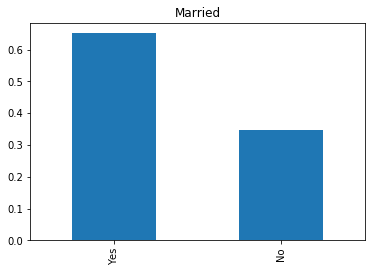

In [30]:
df['Married'].value_counts(normalize=True).plot.bar(title='Married')

Number of married people : 65%

Number of unmarried people : 35%

#### ANALYSIS ON SELF_EMPLOYED VARIABLE

In [34]:
df['Self_Employed'].count()

582

In [35]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [355]:
df['Self_Employed'].value_counts(normalize=True)

No     0.86645
Yes    0.13355
Name: Self_Employed, dtype: float64

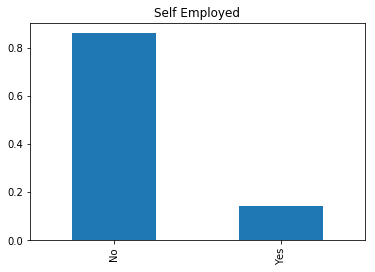

In [37]:
df['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self Employed')

Total number of people : 582

Self_Employed : 82

Not_Self_Employed : 500
    
Among 582 people only 14% are Self_Employed and rest of the 86% are Not_Self_Employed

#### Analysis on "Credit_History" variable :


In [38]:
df['Credit_History'].count()

564

In [39]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [40]:
df['Credit_History'].value_counts(normalize=True)*100

1.0    84.219858
0.0    15.780142
Name: Credit_History, dtype: float64

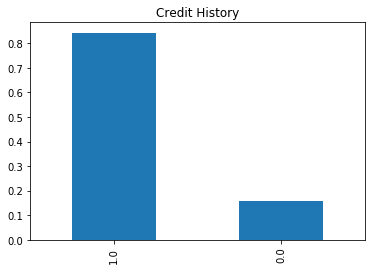

In [41]:
df['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit History')

Total number of debts : 564

Repaid Debts : 475

Not Repaid Debts : 89
    
Around 84% applicants have repaid their debts.

Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

### INDEPENDENT VARIABLE (ORDINAL)

#### Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

#### Analysis on "Dependents" variable:

In [44]:
df['Dependents'].count()

599

In [45]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Number of 0 Dependent : 345

Number of 1 Dependent : 102

Number of 2 Dependesnt : 101

Number of 3+ Dependent : 51

In [46]:
df['Dependents'].value_counts(normalize=True)*100

0     57.595993
1     17.028381
2     16.861436
3+     8.514190
Name: Dependents, dtype: float64

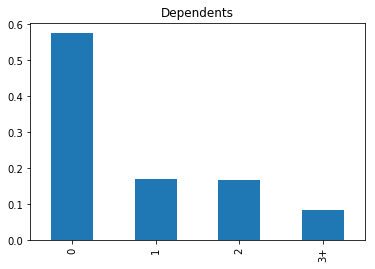

In [47]:
df['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')

58% people have 0 dependent

17% people have 1 dependent

17% people have 2 dependent

8% people have 3+ dependent

#### Analysis on "Education" variable :

In [48]:
df['Education'].count()

614

In [49]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [50]:
df['Education'].value_counts(normalize=True)*100

Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64

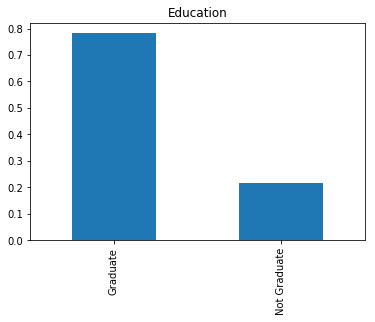

In [51]:
df['Education'].value_counts(normalize=True).plot.bar(title='Education')

Total number of People : 614

78% are Graduated and 22% are not Graduated

#### Analysis on "Property_Area" variable :

In [52]:
df['Property_Area'].count()

614

In [53]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [54]:
df['Property_Area'].value_counts(normalize=True)*100

Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: Property_Area, dtype: float64

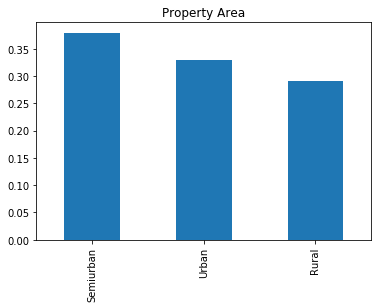

In [55]:
df['Property_Area'].value_counts(normalize=True).plot.bar(title='Property Area')

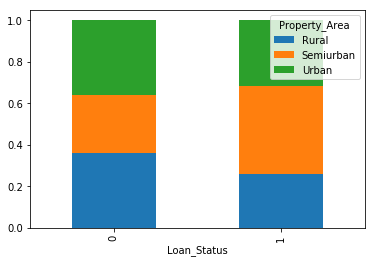

In [270]:
property_area = pd.crosstab(df['Loan_Status'], df['Property_Area'])
property_area.div(property_area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [298]:
property_area.div(property_area.sum(1).astype(float), axis=0)

Property_Area,Rural,Semiurban,Urban
Loan_Status,,,
0,0.359375,0.281250,0.359375
1,0.260664,0.424171,0.315166


In [289]:
df['Loan_Status'].value_counts(normalize=True)

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64

We can see here that, Loan denial for Rural and Urban area is equal to each while for Semiurban area it is slightly less, But when compared to the actual denial rate the Rural and Urban denial rates are slightly higher than the actual denial rate. While for the Semiurban case it is slightly lower.

For the approval case, Semiurban approvals are highest, followed by Urban and then Rural case. 
When compared to the actual approval rate of loans, the loan approval rates for all of them are lower. 

Total number of People : 614

People from Semiurban area : 233

People from Urban area : 202

People from Rural area : 179
    
38% people from Semiurban area

33% people from Urban area

29% people from Rural area

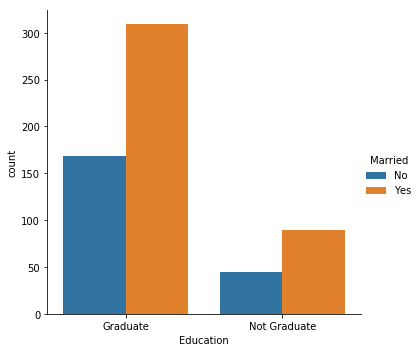

In [21]:
sns.catplot(x='Education', kind='count', hue='Married', data=df)

In [301]:
df['Loan_Status'].value_counts(normalize=True)

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64

In [299]:
credit_history = pd.crosstab( df['Loan_Status'], df['Credit_History'])
credit_history.div(credit_history.sum(1).astype(float), axis=0)

Credit_History,0.0,1.0
Loan_Status,,
0,0.427083,0.572917
1,0.016588,0.983412


The Loan approval rate for people with credit history is significantly higher than people without credit history.
The Loan denial rate for people with credit history is slightly higher than without credit histor.

When compared to the actual loan approval, the people with credit history have much higher approval rate
than people without any credit history. 

### Independent Variable (Numerical)
#### Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

### "ApplicantIncome" distribution:

Text(0.5,1,"Applicant's Income")

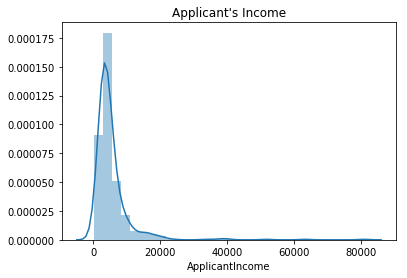

In [65]:
sns.distplot(df['ApplicantIncome'], kde=True, bins=30)
plt.title("Applicant's Income")

The distribution is not normally distributed. It is skewed to the left. 

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society

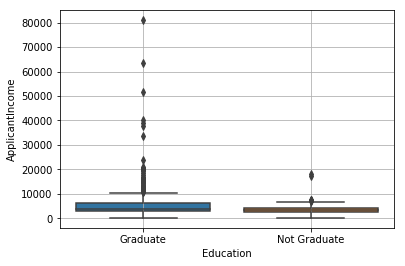

In [71]:
sns.boxplot(y=df['ApplicantIncome'], x=df['Education'])
plt.grid()

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

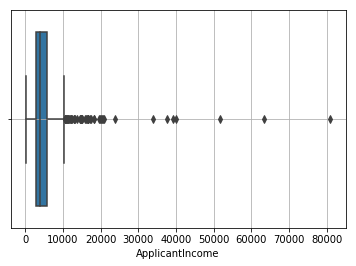

In [72]:
sns.boxplot(df['ApplicantIncome'])
plt.grid()

In [28]:
print('The number of applicants with income more than 20000, is {}.'.format(len(df[df['ApplicantIncome']>20000])))

The number of applicants with income more than 20000, is 12.


### Analysis of "CoApplicant's Income"

THIS IS HIGHLY SKEWED!!


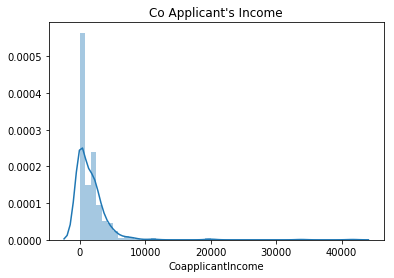

In [367]:
sns.distplot(df['CoapplicantIncome'])
plt.title("Co Applicant's Income")
print('THIS IS HIGHLY SKEWED!!')

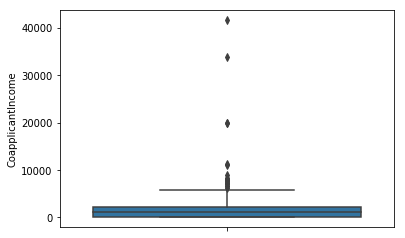

In [368]:
sns.boxplot(df['CoapplicantIncome'], orient='v')

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 500. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

### Distribution of "LoanAmount" variable :

Text(0.5,1,'Loan Amount')

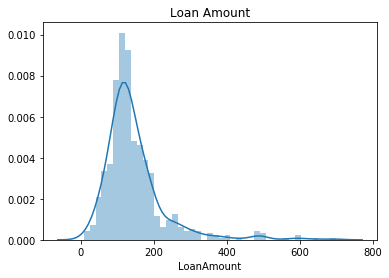

In [78]:
sns.distplot(df['LoanAmount'], kde=True)
plt.title('Loan Amount')

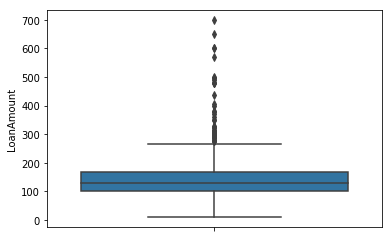

In [80]:
sns.boxplot(df['LoanAmount'], orient='v')

We see a lot of outliers in this variable and the distribution is fairly normal. 

### Distribution of "Loan_Amount_Term" variable

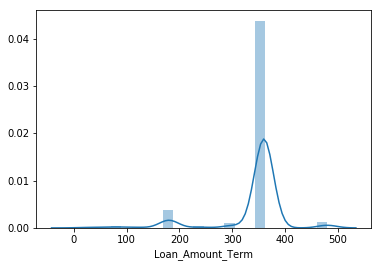

In [85]:
sns.distplot(df['Loan_Amount_Term'])

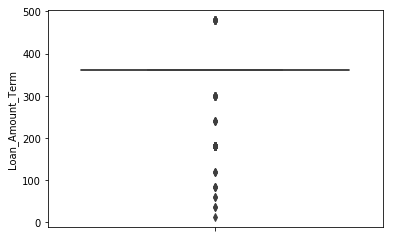

In [88]:
sns.boxplot(df["Loan_Amount_Term"], orient='v')

We see a lot of outliers in this variable and the distribution is fairly normal.

## Bivariate Analysis

Hypothesis generated earlier:

i)Applicants with high income should have more chances of loan approval.

ii)Applicants who have repaid their previous debts should have higher chances of loan approval.

iii)Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.

iv)Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

## Categorical Independent Variable vs Target Variable

### Relation between "Loan_Status" and "Gender"

In [359]:
pd.crosstab(df['Gender'], df['Loan_Status'])

Loan_Status,0,1
Gender,,
Female,37,75
Male,155,347


In [357]:
Gender.div(Gender.sum(1).astype(float), axis=0)

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


Text(0,0.5,'Percentage')

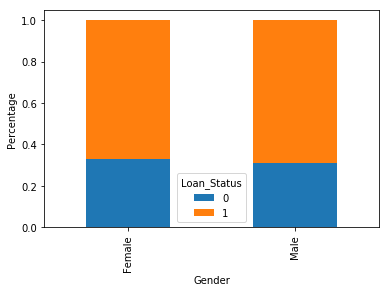

In [358]:
Gender = pd.crosstab(df['Gender'], df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Percentage')

In [249]:
df['Loan_Status'].value_counts(normalize=True)

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64

In [250]:
Gender.div(Gender.sum(1).astype(float), axis=0)

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


Number of Female whose Loan was approed : 75

Number of Male whose Loan was approed : 339

Number of Female whose Loan was not approed : 37

Number of Male whose Loan was not approed : 150

Proportion of Male applicants is higher for the approved loans.

The probability of loan denied for both Male and Females is same as the total probability of Loan denial.
And it is similar for the approval case. 
Thus we can for now say that Gender doesnt really matter in case of Loan Approval.

### Relation between "Loan_Status" and "Married"

Text(0,0.5,'Percentage')

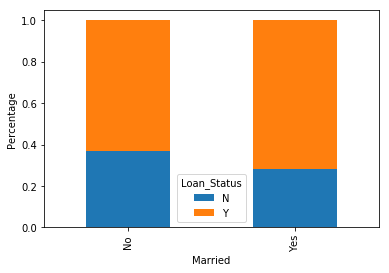

In [105]:
Married = pd.crosstab(df['Married'], df['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.ylabel('Percentage')

In [254]:
df['Loan_Status'].value_counts(normalize=True)

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64

In [106]:
Married.div(Married.sum(1).astype(float), axis=0)

Loan_Status,N,Y
Married,,
No,0.370892,0.629108
Yes,0.283920,0.716080


Number of married people whose Loan was approed : 285

Number of married people whose Loan was not approed : 113

Number of unmarried people whose Loan was approed : 134

Number of unmarried people whose Loan was not approed : 79

Proportion of Married applicants is higher for the approved loans.

The probability of Loan denial for both Married and Unmarried case is very close to probability of Loan Denial in general.
Similarly, the probability of Loan approval for both Married and Unmarried case is close to the actual probability of Loan Approaval.

### Relation between "Loan_Status" and "Education"

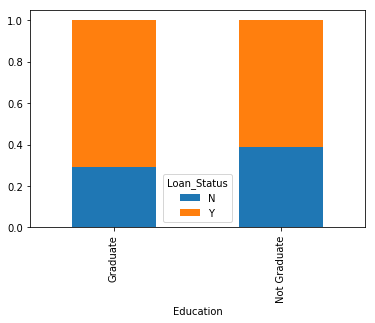

In [109]:
Education = pd.crosstab(df['Education'], df['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [256]:
Education.div(Education.sum(1).astype(float), axis=0)

Loan_Status,N,Y
Education,,
Graduate,0.291667,0.708333
Not Graduate,0.388060,0.611940


In [263]:
df['Loan_Status'].value_counts(normalize=True)

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64

We can clearly see the Loan denial in case of Non-Graduates is higher than Graduates. Loan denial for Non Graduates is higher than the actual Loan denial while for graduates its almost similar. In case of Loan approval, for Graduates it is very similar to the actual, while for Non Graduates it is lower than the actual aprroval rate.

Text(0.5,1,'Number people with respect to Education and Loan Status')

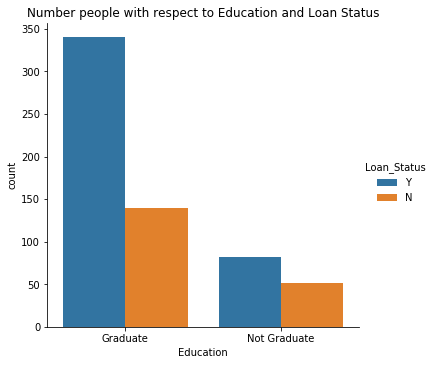

In [23]:
sns.catplot(x='Education', kind='count', hue='Loan_Status', data=df)
plt.title('Number people with respect to Education and Loan Status')

Number of people who are Graduate and Loan was approed : 340

Number of people who are Graduate and Loan was no approed : 140

Number of people who are Not Graduate and Loan was approed : 82

Number of people who are Not Graduate and Loan was not approed : 52

Proportion of Graduate applicants is higher for the approved loans.

## Numerical Independent Variable vs Target Variable

### Relation between "Loan_Status" and "Income":

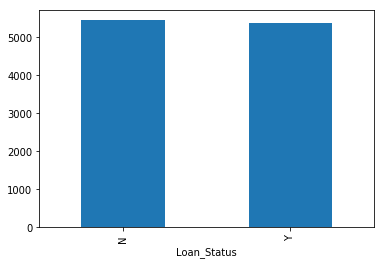

In [110]:
df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Here the y-axis represents the mean applicant income. We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [111]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [363]:
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
df['Income_bin'] = pd.cut(df['ApplicantIncome'], bins, labels=group)

In [364]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,BalanceIncome,Income_bin
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030,5849.0,8.674026,0.355556,5493.444444,High
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030,6091.0,8.714568,0.355556,5735.444444,High
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655,3000.0,8.006368,0.183333,2816.666667,Average
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492,4941.0,8.505323,0.333333,4607.666667,Average
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760,6000.0,8.699515,0.391667,5608.333333,High


In [365]:
pd.crosstab(df['Income_bin'], df['Loan_Status'])

Loan_Status,0,1
Income_bin,,
Low,34,74
Average,67,159
High,45,98
Very High,46,91


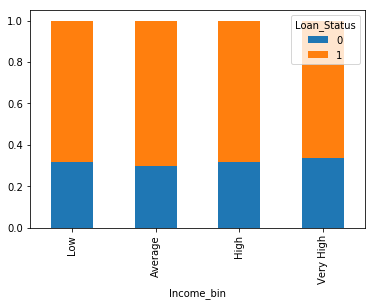

In [366]:
Income_bin = pd.crosstab(df['Income_bin'], df['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

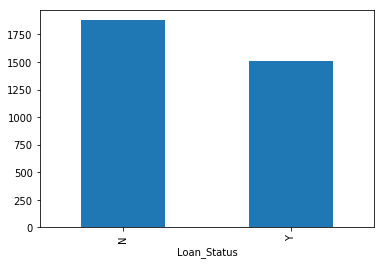

In [116]:
df.groupby('Loan_Status')['CoapplicantIncome'].mean().plot.bar()

The mean coapplicant's Income of Loan not approved is higher than the approved ones.

In [117]:
df['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [128]:
bins = [0, 1000, 3000, 4200]
group = ['Low', 'Average', 'High']
df['CoapplicantIncome_bin'] = pd.cut(df['CoapplicantIncome'], bins, labels=group)

In [133]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,CoapplicantIncome_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN


In [130]:
pd.crosstab(df['CoapplicantIncome_bin'], df['Loan_Status'])

Loan_Status,N,Y
CoapplicantIncome_bin,,
Low,3,19
Average,61,161
High,15,32


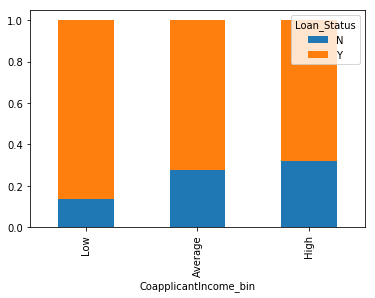

In [131]:
CoapplicantIncome_bin = pd.crosstab(df['CoapplicantIncome_bin'], df['Loan_Status'])
CoapplicantIncome_bin.div(CoapplicantIncome_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

In [134]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [135]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,CoapplicantIncome_bin,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0


In [137]:
df['TotalIncome'].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: TotalIncome, dtype: float64

In [138]:
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
df['TotalIncome_bin'] = pd.cut(df['TotalIncome'], bins, labels=group)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,CoapplicantIncome_bin,TotalIncome,TotalIncome_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN,5849.0,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,Very High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,High
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0,High


Text(0,0.5,'Percentage')

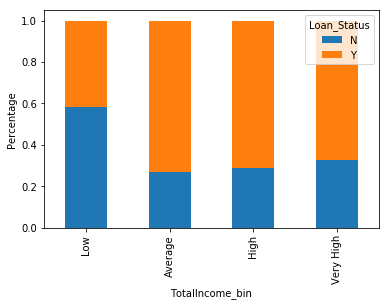

In [140]:
TotalIncome_bin = pd.crosstab(df['TotalIncome_bin'], df['Loan_Status'])
TotalIncome_bin.div(TotalIncome_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

### Relation between "Loan_Status" and "Loan Amount"

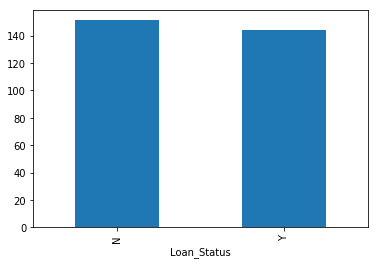

In [142]:
df.groupby('Loan_Status')['LoanAmount'].mean().plot.bar()

It seems the average Loan Amount is same for approved and non approved Loans. Lets do further analysis by dividing into bins and seeing how the Loan approved changes over different groups.

In [143]:
df['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [144]:
bins = [0, 100, 200, 700]
group = ['Low', 'Average', 'High']
df['LoanAmount_bin'] = pd.cut(df['LoanAmount'], bins, labels=group)

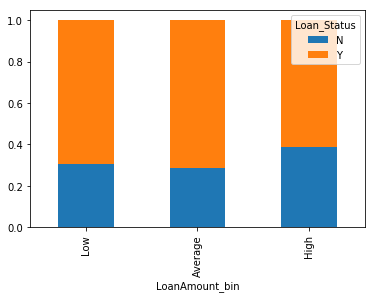

In [146]:
LoanAmount_bin = pd.crosstab(df['LoanAmount_bin'], df['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [145]:
pd.crosstab(df['LoanAmount_bin'], df['Loan_Status'])

Loan_Status,N,Y
LoanAmount_bin,,
Low,47,107
Average,103,255
High,31,49


In [147]:
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0)

Loan_Status,N,Y
LoanAmount_bin,,
Low,0.305195,0.694805
Average,0.287709,0.712291
High,0.387500,0.612500


It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

In [151]:
df.drop(columns=["Income_bin","CoapplicantIncome_bin","LoanAmount_bin","TotalIncome","TotalIncome_bin"],inplace=True)

In [152]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Encoding Dependents and Loan Status variables from 

In [154]:
## Converting Loan Status Column from categorical to numeric values. Yes=1 and No=0
df['Loan_Status'].replace({'Y': 1, 'N':0}, inplace=True)
df['Dependents'].replace({'1':int(1),
                         '0': int(0),
                         '2': int(2),
                         '3+': int(3)},
                         inplace=True)

In [155]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


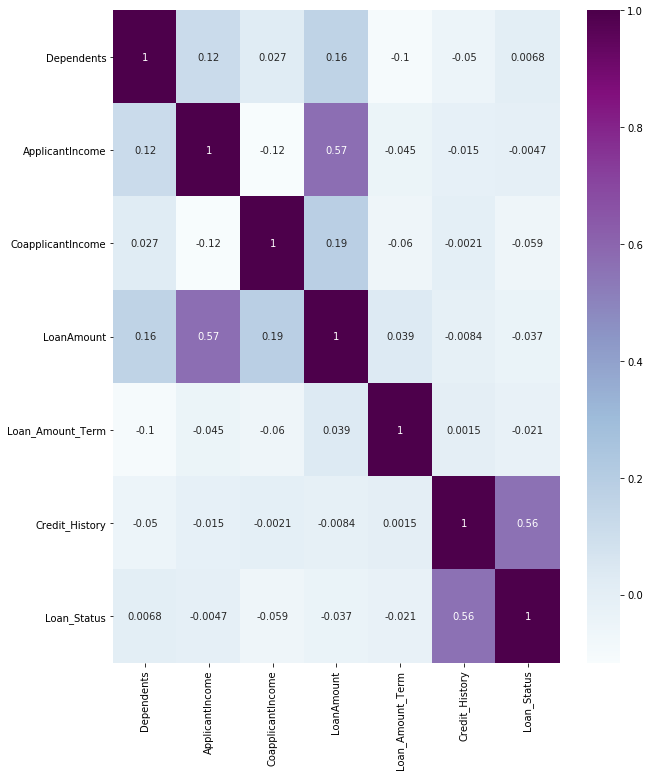

In [157]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,12))
sns.heatmap(corr, cmap='BuPu', annot=True)

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status).

In [159]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [160]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [173]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df['Dependents'].fillna(df["Dependents"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)

In [174]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [185]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [187]:
df['Loan_Amount_Term'].fillna(360.0, inplace=True)

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values.

We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [191]:
df["LoanAmount"].fillna(df["LoanAmount"].median(),inplace=True)

In [192]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

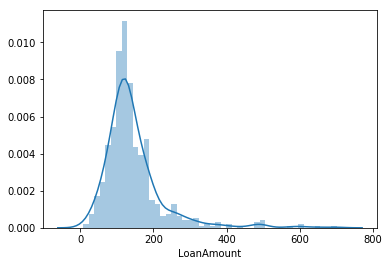

In [193]:
sns.distplot(df['LoanAmount'])

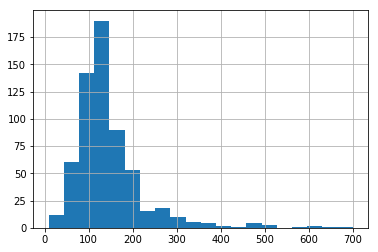

In [196]:
df['LoanAmount'].hist(bins=20)

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness.

One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values.

So, we get a distribution similar to normal distribution.

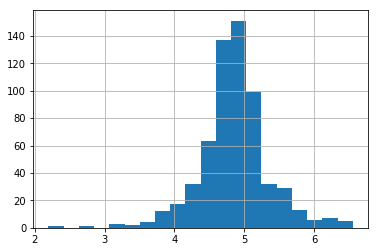

In [197]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

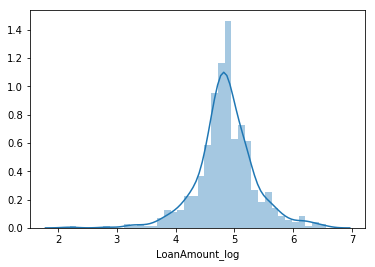

In [199]:
sns.distplot(df['LoanAmount_log'])

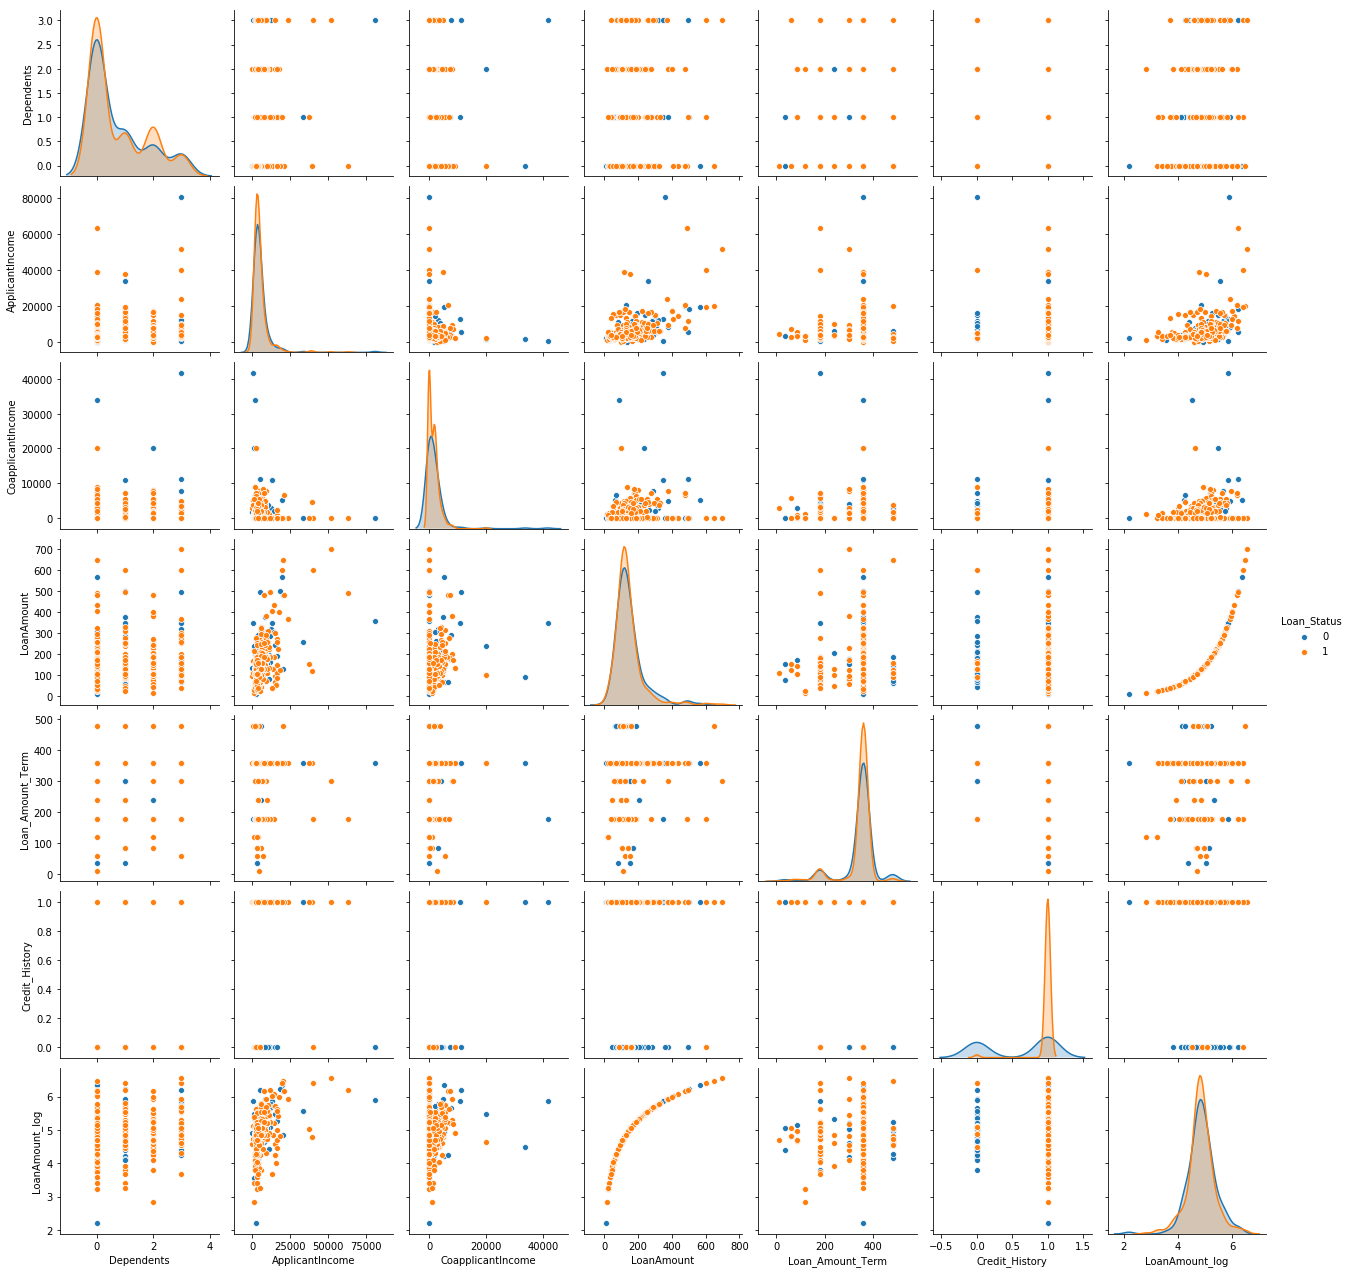

In [201]:
sns.pairplot(df, hue='Loan_Status')

In [202]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1,5.587249
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1,4.553877
7,LP001014,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0,5.062595
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,1,5.123964
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0,5.855072


## Feature Engineering

Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

Total Income - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.

EMI - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.

Balance Income - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [203]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

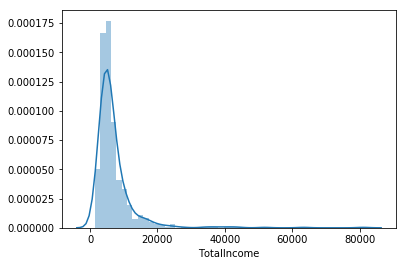

In [204]:
sns.distplot(df['TotalIncome'])

We can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

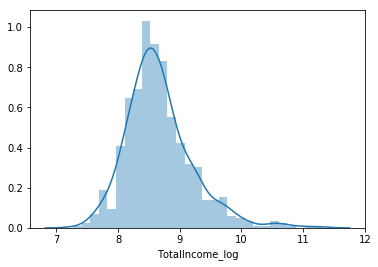

In [205]:
df['TotalIncome_log'] = np.log(df['TotalIncome'])
sns.distplot(df['TotalIncome_log'])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

#### Let's create EMI feature now and check its distribution.

In [206]:
df['EMI'] = df['LoanAmount']/df['Loan_Amount_Term']

In [217]:
df['EMI'].describe()

count    614.000000
mean       0.473687
std        0.511134
min        0.025000
25%        0.288889
50%        0.361111
75%        0.505556
max        9.250000
Name: EMI, dtype: float64

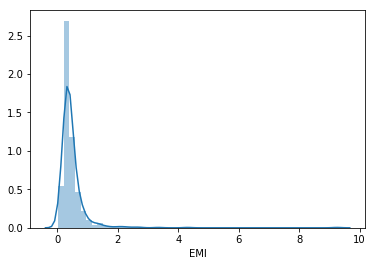

In [207]:
sns.distplot(df['EMI'])

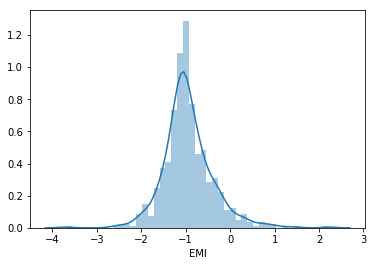

In [214]:
sns.distplot(np.log(df['EMI']))

#### Let's create Balance Income feature now and check its distribution.

In [208]:
df['BalanceIncome'] = df['TotalIncome'] - df['EMI']*1000

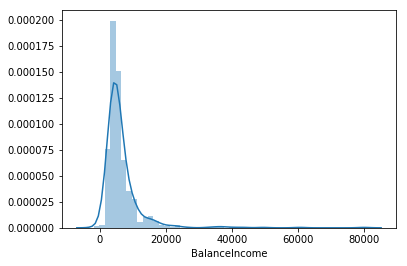

In [209]:
sns.distplot(df['BalanceIncome'])

/home/azlaan/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


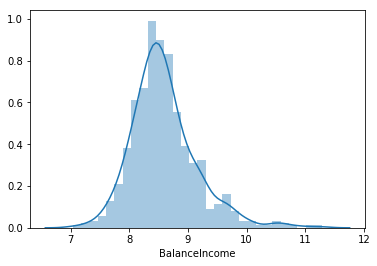

In [219]:
sns.distplot(np.log(df['BalanceIncome']))

In [213]:
df[df['BalanceIncome']<0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,BalanceIncome
262,LP001870,Female,No,1.0,Graduate,No,3481,0.0,155.0,36.0,1.0,Semiurban,0,5.043425,3481.0,8.155075,4.305556,-824.555556
497,LP002588,Male,Yes,0.0,Graduate,No,4625,2857.0,111.0,12.0,1.0,Urban,1,4.709530,7482.0,8.920255,9.250000,-1768.000000


In [221]:
df.columns.values

array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status', 'LoanAmount_log', 'TotalIncome',
       'TotalIncome_log', 'EMI', 'BalanceIncome'], dtype=object)

In [223]:
df.to_csv('loan_added_features.csv')

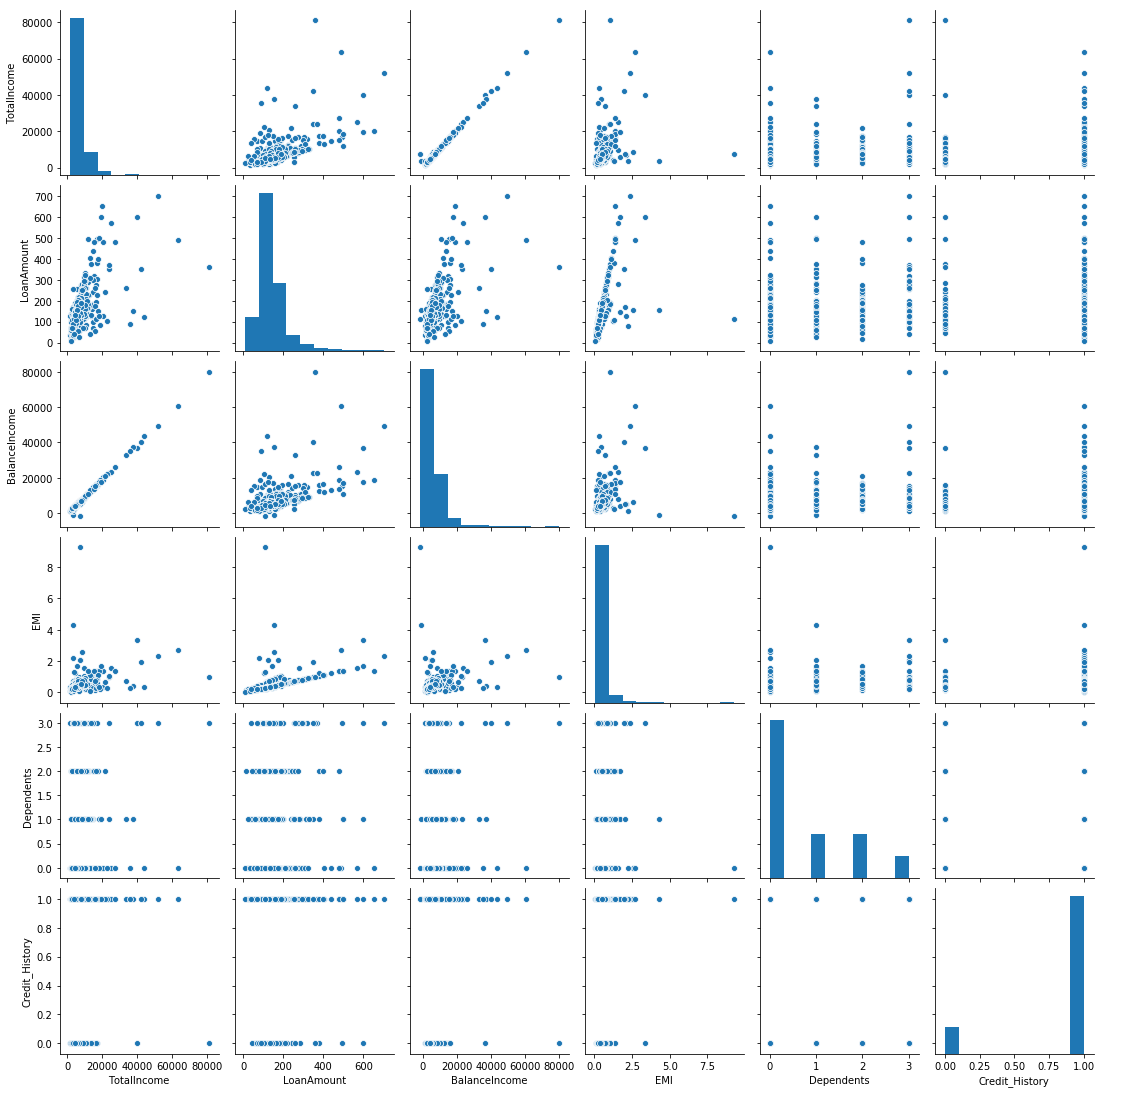

In [233]:
sns.pairplot(df[['TotalIncome', 'LoanAmount', 'BalanceIncome', 'EMI', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']])

In [227]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [228]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [229]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [230]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

## Hypothesis Testing

In [309]:
from scipy.stats import chisquare, chi2_contingency 

In [305]:
property_area = pd.crosstab(df['Loan_Status'], df['Property_Area']) 
property_area.div(property_area.sum(1).astype(float), axis=0)

Property_Area,Rural,Semiurban,Urban
Loan_Status,,,
0,0.359375,0.281250,0.359375
1,0.260664,0.424171,0.315166


### Null hypothesis: every independent_variable_category has equal chances of getting a loan; [m1 == m2]

### Alternate hypothesis : not equal chances; [m1 != m2]

In [333]:
df.columns.values

array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status', 'LoanAmount_log', 'TotalIncome',
       'TotalIncome_log', 'EMI', 'BalanceIncome'], dtype=object)

In [321]:
def Hypothesis_check(table, alpha):
    # Table is the contingency table obtained using the pd.crosstab(df['Dependent_variable'], 
    #                                                               df['Independent_variable'])
    stat, p, dof, expected = chi2_contingency(table)
    print('The chi-squared test statistic is {} and the p-value is {}'.format(stat, p))
    if p > alpha:
        return 'The Null Hypothesis holds True, they are Independent.'
    else:
        return 'Dependent (Reject Null Hypothesis!)'

In [322]:
Hypothesis_check(property_area, 0.05)

The chi-squared test statistic is 12.2976231305 and the p-value is 0.00213601878116


'Dependent (Reject Null Hypothesis!)'

In [323]:
Hypothesis_check(pd.crosstab(df['Loan_Status'], df['Gender']), 0.05)

The chi-squared test statistic is 0.110878546912 and the p-value is 0.739146131087


'The Null Hypothesis holds True, they are Independent.'

In [331]:
Hypothesis_check(pd.crosstab(df['Loan_Status'], df['Education']), 0.05)

The chi-squared test statistic is 4.0914904133 and the p-value is 0.0430996212936


'Dependent (Reject Null Hypothesis!)'

In [337]:
Hypothesis_check(pd.crosstab(df['Loan_Status'], df['Credit_History']), 0.05)

The chi-squared test statistic is 176.114574624 and the p-value is 3.41834999791e-40


'Dependent (Reject Null Hypothesis!)'

In [341]:
Hypothesis_check(pd.crosstab(df['Loan_Status'], df['Married']), 0.05)

The chi-squared test statistic is 4.73187557933 and the p-value is 0.0296085808626


'Dependent (Reject Null Hypothesis!)'

In [342]:
chisquare(df['TotalIncome'])

Power_divergenceResult(statistic=3640137.1330488794, pvalue=0.0)

#### We can probably remove the applicant with very high level of income

In [30]:
df.columns.values

array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'], dtype=object)

### Using BoxPlot to calculate Z-Score

In [116]:
df.set_index('Loan_ID', drop=True, inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [70]:
zscore_columns = df.describe().columns.to_list()
zscore_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'ApplicantIncome_Z_score',
 'CoapplicantIncome_Z_score',
 'LoanAmount_Z_score',
 'Loan_Amount_Term_Z_score',
 'Credit_History_Z_score']

In [60]:
def Z_Score_calculator():
    for col in zscore_columns:
        mean = df[str(col)].mean()
        std = df[str(col)].std()
        column_name = col + '_Z_score'
        df[column_name] = df[col].apply(lambda x: (x-mean)/std)

In [61]:
Z_Score_calculator()
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Z_score,CoapplicantIncome_Z_score,LoanAmount_Z_score,Loan_Amount_Term_Z_score,Credit_History_Z_score
Loan_ID,,,,,,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072931,-0.554036,NaN,0.276411,0.432477
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134302,-0.038700,-0.215127,0.276411,0.432477
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393427,-0.554036,-0.939534,0.276411,0.432477
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.461686,0.251774,-0.308599,0.276411,0.432477
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.097649,-0.554036,-0.063236,0.276411,0.432477
LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,0.002217,0.879882,1.408945,0.276411,0.432477
LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,-0.502609,-0.035966,-0.600698,0.276411,0.432477
LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,-0.387534,0.301668,0.135392,0.276411,-2.308163
LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,-0.228753,-0.032549,0.252232,0.276411,0.432477


In [84]:
df.drop(columns = ['Credit_History_Z_score', 'Loan_Amount_Term_Z_score'], inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Z_score,CoapplicantIncome_Z_score,LoanAmount_Z_score
Loan_ID,,,,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072931,-0.554036,NaN
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134302,-0.038700,-0.215127
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393427,-0.554036,-0.939534
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.461686,0.251774,-0.308599
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.097649,-0.554036,-0.063236


In [108]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

### Dropping Columns without any Loan Amount mentioned in the Dataset since the Loan amount is one of the important factors for prediction of Loan granted or not!!

In [117]:
df.drop(index=df[df['LoanAmount'].isna()==True].index.values, inplace=True)
#df.head()
df.shape[0]

592

In [119]:
df.shape

(592, 12)

In [118]:
print('The Loan Amount values are following: \n Average Values {} and \n the total number of customers with Loan Amount greater than 400 is {}'.format(np.mean(df['LoanAmount']), len(df[df['LoanAmount']>400])))

The Loan Amount values are following: 
 Average Values 146.412162162 and 
 the total number of customers with Loan Amount greater than 400 is 14


### Correlation 

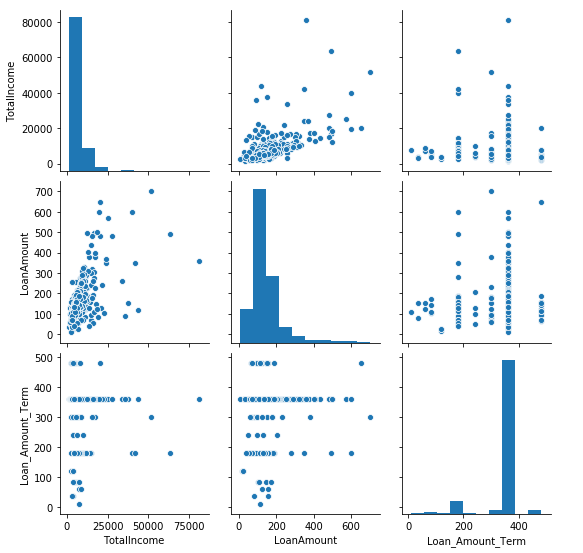

In [234]:
sns.pairplot(df[['TotalIncome', 'LoanAmount', 'Loan_Amount_Term']])

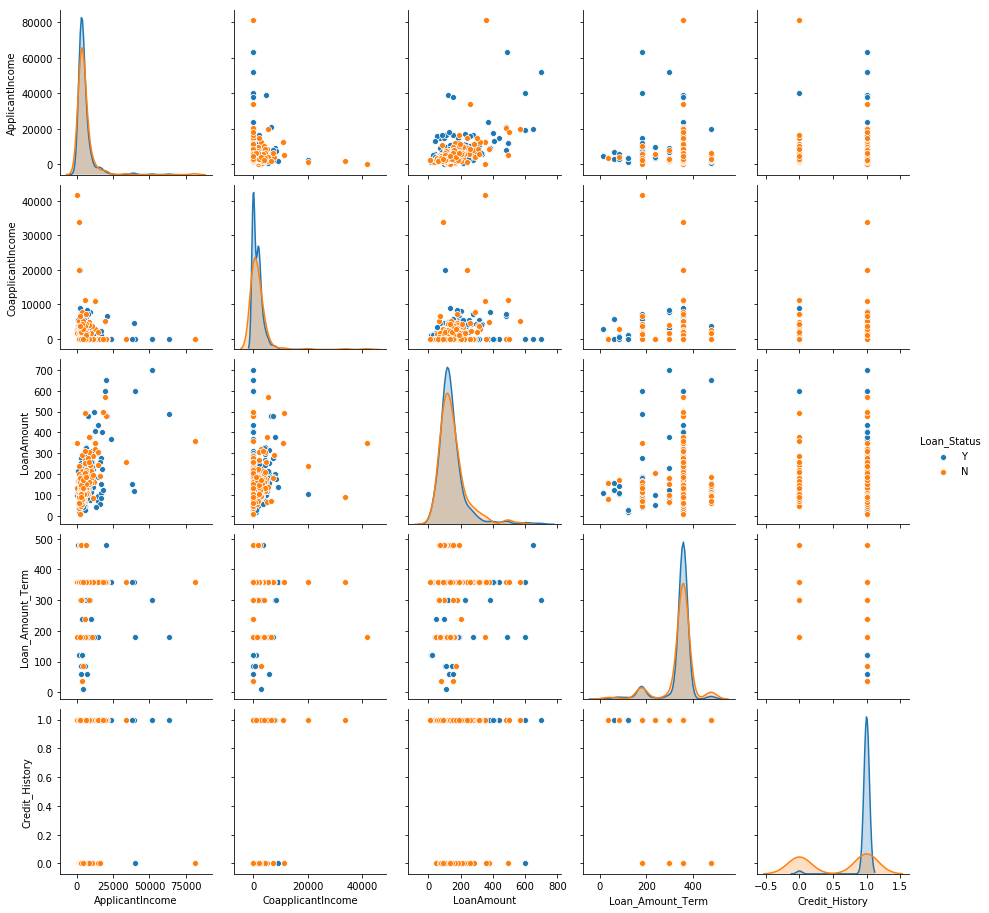

In [115]:
## Lets make a pairplot to examine the correlation between different species
sns.pairplot(df, hue='Loan_Status')

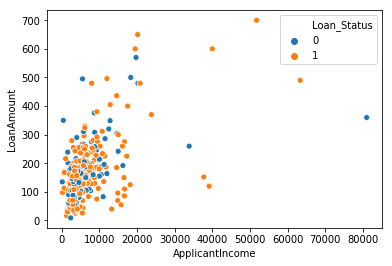

In [147]:
sns.scatterplot(df['ApplicantIncome'], df['LoanAmount'], data=df, hue='Loan_Status')

In [106]:
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_ID,,,,
LP001003,4583,1508.0,128.0,360.0
LP001005,3000,0.0,66.0,360.0
LP001006,2583,2358.0,120.0,360.0
LP001008,6000,0.0,141.0,360.0
LP001011,5417,4196.0,267.0,360.0
LP001013,2333,1516.0,95.0,360.0
LP001014,3036,2504.0,158.0,360.0
LP001018,4006,1526.0,168.0,360.0
LP001020,12841,10968.0,349.0,360.0


In [151]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [158]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Converting categorical variables to Dummy Variables

In [120]:
cat_columns = df.dtypes[df.dtypes =='object'].index.to_list()
cat_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [121]:
df[cat_columns].isna().sum()

Gender           13
Married           2
Dependents       13
Education         0
Self_Employed    31
Property_Area     0
Loan_Status       0
dtype: int64

In [168]:
for i in cat_columns:
    print(i, df[str(i)].unique())

('Gender', array(['Male', 'Female', nan], dtype=object))
('Married', array(['No', 'Yes', nan], dtype=object))
('Dependents', array(['0', '1', '2', '3+', nan], dtype=object))
('Education', array(['Graduate', 'Not Graduate'], dtype=object))
('Self_Employed', array(['No', 'Yes', nan], dtype=object))
('Property_Area', array(['Urban', 'Rural', 'Semiurban'], dtype=object))
('Loan_Status', array(['Y', 'N'], dtype=object))


### Encoding Categorical values

In [125]:
## Binary Encoding Gender Variable
## Male = 0; Female = 1  
df['Gender'].replace({'Male':0, 'Female':1}, inplace=True) 

Loan_ID
LP001003    0.0
LP001005    0.0
LP001006    0.0
LP001008    0.0
LP001011    0.0
LP001013    0.0
LP001014    0.0
LP001018    0.0
LP001020    0.0
LP001024    0.0
LP001027    0.0
LP001028    0.0
LP001029    0.0
LP001030    0.0
LP001032    0.0
LP001034    0.0
LP001036    1.0
LP001038    0.0
LP001041    0.0
LP001043    0.0
LP001046    0.0
LP001047    0.0
LP001050    NaN
LP001052    0.0
LP001066    0.0
LP001068    0.0
LP001073    0.0
LP001086    0.0
LP001087    1.0
LP001091    0.0
           ... 
LP002898    0.0
LP002911    0.0
LP002912    0.0
LP002916    0.0
LP002917    1.0
LP002925    NaN
LP002926    0.0
LP002928    0.0
LP002931    0.0
LP002933    NaN
LP002936    0.0
LP002938    0.0
LP002940    0.0
LP002941    0.0
LP002943    0.0
LP002945    0.0
LP002948    0.0
LP002949    1.0
LP002950    0.0
LP002953    0.0
LP002958    0.0
LP002959    1.0
LP002961    0.0
LP002964    0.0
LP002974    0.0
LP002978    1.0
LP002979    0.0
LP002983    0.0
LP002984    0.0
LP002990    1.0
Name: Gender, Le

In [127]:
## Dropping rows with no Gender values
df['Gender'].dropna(inplace=True)
print(df.shape)

(592, 12)


In [130]:
## Binary Encoding Married Variable
## No = 0; Yes = 1
df['Married'].replace({'Yes':1, 'No':0}, inplace=True)

In [133]:
df['Married'].dropna(inplace=True)
df.shape

(592, 12)

In [153]:
## Filling all the misisng values for the Dependents variable with 0.
df['Dependents'].fillna(0, inplace=True)

In [157]:
## Replacing the Education variable with Binary Encoding, 
## Graduate = 1  and Not Graduate = 0
df['Education'].replace({'Graduate': 1,
                         'Not Graduate': 0},
                          inplace=True)

In [171]:
## Binary Encoding Self Employed Variable
## No = 0; Yes = 1
df['Self_Employed'].replace({'Yes':1,
                             'No':0}, 
                             inplace=True)
df['Self_Employed'].unique()

array([ 0.,  1., nan])

In [172]:
df[df['Self_Employed'].isna()==True]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001027,0.0,1.0,2.0,1,NaN,2500,1840.0,109.0,360.0,1.0,Urban,1
LP001041,0.0,1.0,0.0,1,NaN,2600,3500.0,115.0,NaN,1.0,Urban,1
LP001052,0.0,1.0,1.0,1,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,0
LP001087,1.0,0.0,2.0,1,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,1
LP001091,0.0,1.0,1.0,1,NaN,4166,3369.0,201.0,360.0,NaN,Urban,0
LP001370,0.0,0.0,0.0,0,NaN,7333,0.0,120.0,360.0,1.0,Rural,0
LP001387,1.0,1.0,0.0,1,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,1
LP001398,0.0,0.0,0.0,1,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,1
LP001546,0.0,0.0,0.0,1,NaN,2980,2083.0,120.0,360.0,1.0,Rural,1


In [173]:
##Replacing the Nan values in the Self Employed category with 0
df['Self_Employed'].isna().sum()

31

## Comparing with respect to the Z-Score